In [3]:
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.6/106.6 kB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter const

In [4]:
!pip install super-gradients

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.0 MB/s eta 0:00:00
  Using cached boto3-1.35.83-py3-none-any.whl.metadata (6.7 kB)
  Using cached coverage-5.3.1-cp310-cp310-linux_x86_64.whl
  Using cached Sphinx-4.0.3-py3-none-any.whl.metadata (8.0 kB)
  Using cached sphinx_rtd_theme-3.0.2-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached torchmetrics-0.8.0-py3-none-any.whl.metadata (20 kB)
  Using cached hydra_core-1.3.2-py3-none-any.whl.metadata (5.5 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached pip_tools-7.4.1-py3-none-any.whl.metadata (26 kB)
  Using cached einops-0.3.2-py3-none-any.whl.metadata (10 kB)
  Using cached protobuf-3.20.3-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (679 bytes)
  Using cached treelib-1.6.1-py3-none-any.whl
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached stringcase-1.2.0-py3-none-any.whl
  Using cached numpy-1.23.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014

In [1]:
from super_gradients.training import Trainer

from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val


The console stream is logged into /root/sg_logs/console.log


[2024-12-18 09:33:06] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-12-18 09:33:16] INFO - utils.py - NumExpr defaulting to 2 threads.


In [2]:

from IPython.display import clear_output

In [3]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback



In [4]:

from super_gradients.training import models

In [5]:
CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='lidar_yolonas_run', ckpt_root_dir=CHECKPOINT_DIR)

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fldjyS8yDicGn64DAbOk")
project = rf.workspace("demo-gmvrh").project("infrared-light-traffic")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to infrared-light-traffic-2 in yolov5pytorch::   0%|          | 0/18430 [00:00<?, ?it/s]

Extracting Dataset Version Zip to infrared-light-traffic-2 in yolov5pytorch:: 100%|██████████| 18430/18430 [00:02<00:00, 7598.33it/s]


In [7]:

dataset_params = {
    'data_dir':'/content/infrared-light-traffic-2',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes':['car', 'crosswalk', 'cyclist', 'light', 'person', 'sign', 'sign_danger']

}

In [8]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)
clear_output()


Indexing dataset annotations: 100%|██████████| 1059/1059 [00:00<00:00, 2310.96it/s]


In [9]:
train_data.dataset.transforms

In [10]:

train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [11]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42


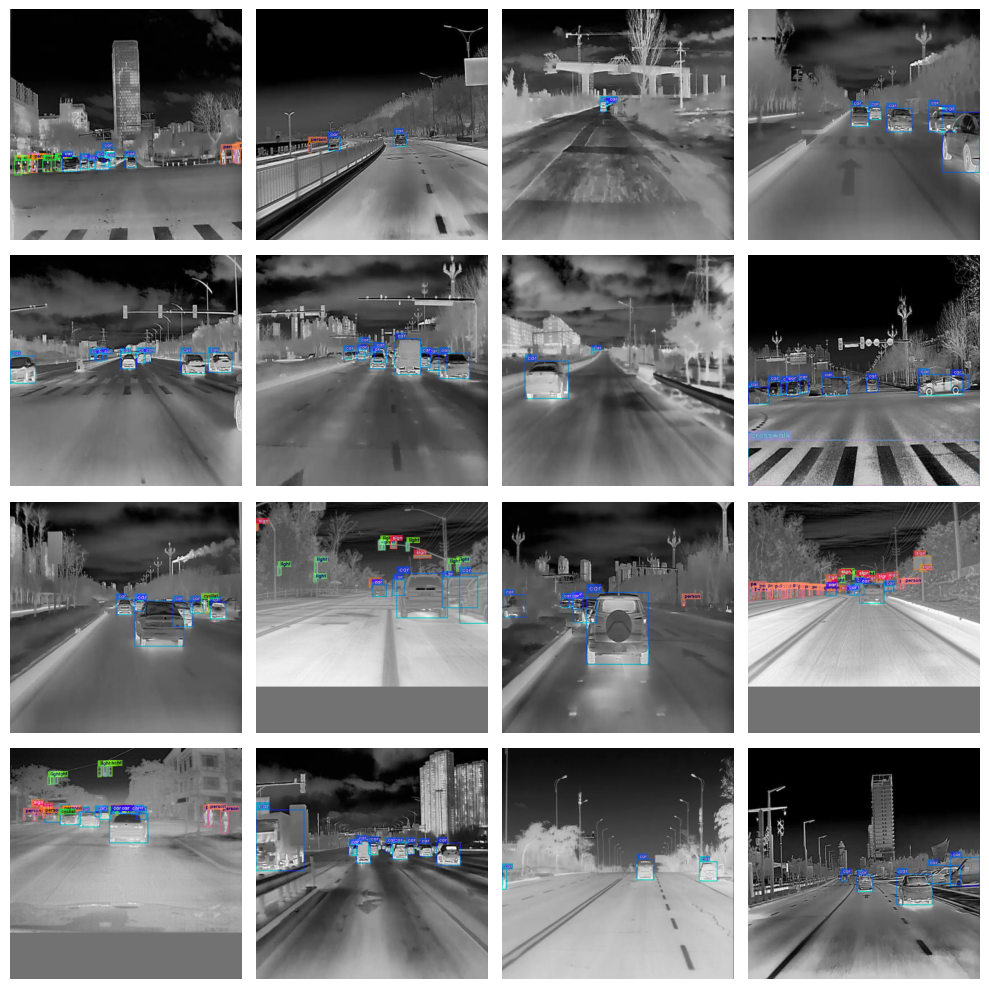

In [12]:

test_data.dataset.plot()

In [14]:
import os
from pathlib import Path
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Download pre-trained YOLOv5 model
def load_model():
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
    return model

# Perform object detection on an image
def detect_objects(model, image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Perform detection
    results = model(img)

    # Get detection results
    df = results.pandas().xyxy[0]  # pandas DataFrame

    # Prepare detection summary
    detected_classes = df['name'].unique()
    detection_count = df['name'].value_counts().to_dict()

    # Visualize results
    img_detected = img.copy()
    for _, row in df.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        label = row['name']
        confidence = row['confidence']

        # Draw rectangle
        cv2.rectangle(img_detected, (x1, y1), (x2, y2), (36, 255, 12), 2)

        # Add label
        (text_width, text_height), _ = cv2.getTextSize(f"{label}: {confidence:.2f}", cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
        cv2.rectangle(img_detected, (x1, y1-text_height-4), (x1+text_width, y1), (36, 255, 12), -1)
        cv2.putText(img_detected, f"{label}: {confidence:.2f}", (x1, y1-4), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)

    return detected_classes, detection_count, img_detected

# Main function to run detection on a file or folder
def run_detection(input_path):
    # Load the model
    model = load_model()

    output_dir = Path("output_images")
    output_dir.mkdir(exist_ok=True)  # Create output directory if it doesn't exist

    # Check if input is a file or folder
    if os.path.isfile(input_path):
        # Process a single file
        detected_classes, detection_count, img_detected = detect_objects(model, input_path)

        # Save and display the detected image
        output_image_path = output_dir / Path(input_path).name
        cv2.imwrite(str(output_image_path), img_detected)

        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Detection Summary for {os.path.basename(input_path)}")
        plt.show()

        print("Detected Classes:", ", ".join(detected_classes))
        print("\nDetection Counts:")
        for cls, count in detection_count.items():
            print(f"{cls}: {count}")

    elif os.path.isdir(input_path):
        # Process all images in the folder
        for filename in os.listdir(input_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(input_path, filename)
                detected_classes, detection_count, img_detected = detect_objects(model, image_path)

                # Save the detected image to output directory
                output_image_path = output_dir / filename
                cv2.imwrite(str(output_image_path), img_detected)

                # Display the detected image
                plt.figure(figsize=(12, 8))
                plt.imshow(cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB))
                plt.axis('off')
                plt.title(f"Detection Summary for {filename}")
                plt.show()

                print(f"\nDetection Summary for {filename}:")
                print("Detected Classes:", ", ".join(detected_classes))
                print("\nDetection Counts:")
                for cls, count in detection_count.items():
                    print(f"{cls}: {count}")

    else:
        print("Invalid input path. Please provide a valid file or folder path.")

# Example usage: update this path to your actual image or folder path.
run_detection('/content/infrared-light-traffic-2/train/images')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-18 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 38506_self_driving_infrad_jpg.rf.6e49fe4559c69eb56559fe26933d9686.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 30573_self_driving_infrad_jpg.rf.b6aec71b2b8241a8159dc28fe7749ae4.jpg:
Detected Classes: car, truck, parking meter

Detection Counts:
car: 2
truck: 1
parking meter: 1

Detection Summary for video-a9TgkAvMGtM2gXpdj-frame-002134-zCtMKiHM99HcwCmzk_jpg.rf.0480b1a0aff8d2e2fdf4d939b72c91c5.jpg:
Detected Classes: car, traffic light

Detection Counts:
traffic light: 5
car: 3

Detection Summary for 31970_self_driving_infrad_jpg.rf.36fcb01abd295bdfc89036ef33d6fea1.jpg:
Detected Classes: car, bus

Detection Counts:
car: 4
bus: 1

Detection Summary for 40372_self_driving_infrad_jpg.rf.9a92a4d8dab4326b599b82aa0068bde0.jpg:
Detected Classes: car

Detection Counts:
car: 5


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 36510_self_driving_infrad_jpg.rf.4bcf6e8788896f9afed309e79b81a637.jpg:
Detected Classes: car

Detection Counts:
car: 7

Detection Summary for 34835_self_driving_infrad_jpg.rf.2728a09ef600ab66a8405bc9be530dbf.jpg:
Detected Classes: car, truck, bus

Detection Counts:
car: 5
truck: 2
bus: 1

Detection Summary for 39647_self_driving_infrad_jpg.rf.fee790af7719984cd60cbfafb0a6b7d1.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 30778_self_driving_infrad_jpg.rf.bd5c70693e4829cfdba301b027a24f89.jpg:
Detected Classes: boat, car

Detection Counts:
boat: 1
car: 1

Detection Summary for 31507_self_driving_infrad_jpg.rf.188cf3cc84a40ffd83028ae03819f0c0.jpg:
Detected Classes: truck, car

Detection Counts:
truck: 3
car: 2

Detection Summary for 37954_self_driving_infrad_jpg.rf.92acb55a33b0e0085371521a4f1405ca.jpg:
Detected Classes: car

Detection Counts:
car: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 34946_self_driving_infrad_jpg.rf.8e108acd570c74d9de1fbe65f8c33f00.jpg:
Detected Classes: boat, truck

Detection Counts:
boat: 1
truck: 1

Detection Summary for 34664_self_driving_infrad_jpg.rf.045041b89cf402101bc1381d6bc85c4b.jpg:
Detected Classes: car, boat, truck

Detection Counts:
car: 10
boat: 2
truck: 2

Detection Summary for 34359_self_driving_infrad_jpg.rf.68938654cf18ea97b0ab98d34b1ab409.jpg:
Detected Classes: car, truck

Detection Counts:
car: 7
truck: 1

Detection Summary for 31059_self_driving_infrad_jpg.rf.31067042b5341b498c9f16ddc3cd9662.jpg:
Detected Classes: kite, skis, boat, bird

Detection Counts:
bird: 3
kite: 2
boat: 2
skis: 1

Detection Summary for 1008_street_jpg.rf.7d58af3718b4d2d8962559dbf924d99d.jpg:
Detected Classes: car, truck, stop sign

Detection Counts:
car: 5
truck: 2
stop sign: 1

Detection Summary for 38408_self_driving_infrad_jpg.rf.3555496fcfe8c1fffe3012c7a1427db4.jpg:
Detected Classes: 

Detection Counts:


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 42794_self_driving_infrad_jpg.rf.a94c188c27be9eea7e59719e1cab8743.jpg:
Detected Classes: bus, car, traffic light, truck

Detection Counts:
bus: 4
car: 2
traffic light: 2
truck: 2

Detection Summary for video-bk2x9u9JivsWRS9Nk-frame-007194-nnSevEGxLebhEzrZf_jpg.rf.bcc562d89ae5047e89cc9cae1a0d55e0.jpg:
Detected Classes: car, traffic light, person

Detection Counts:
car: 6
traffic light: 1
person: 1

Detection Summary for 44004_self_driving_infrad_jpg.rf.5a6421875399193bb69dea251eb03ce5.jpg:
Detected Classes: train, car

Detection Counts:
train: 1
car: 1

Detection Summary for video-aMQG7QCtJKfnEdue5-frame-000325-u4ftrdqquKkfeTxvB_jpg.rf.7245273f9c15c1190be127c24fec7298.jpg:
Detected Classes: bus, car, traffic light, person

Detection Counts:
person: 6
car: 3
traffic light: 2
bus: 1

Detection Summary for 445_street_jpg.rf.25b26e28e96500e45675a4a1b027e4b7.jpg:
Detected Classes: clock

Detection Counts:
clock: 1

Detection Summary for 31571_self_driving_infrad_jpg.rf

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 30018_self_driving_infrad_jpg.rf.d26113e93664c7ecb93924c83d9ae768.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 43108_self_driving_infrad_jpg.rf.9b50514074bf741ec10c4512cd48a8b2.jpg:
Detected Classes: car, person

Detection Counts:
car: 9
person: 1

Detection Summary for 61_street_jpg.rf.a6e50e3e3c9eaad41dbf60c451ab2dd5.jpg:
Detected Classes: bus, traffic light

Detection Counts:
traffic light: 2
bus: 1

Detection Summary for 34956_self_driving_infrad_jpg.rf.5c00bff1d26b03d5c0e355a66c958f68.jpg:
Detected Classes: boat, truck, car

Detection Counts:
boat: 2
car: 2
truck: 1

Detection Summary for 37342_self_driving_infrad_jpg.rf.5d3aa9bef7b53cf8e1edb1006c1eb021.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 42709_self_driving_infrad_jpg.rf.9b0fb22314a6120e70cfa8c76b9fe2e1.jpg:
Detected Classes: bus

Detection Counts:
bus: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 1483_street_jpg.rf.6c60eeea299be4b43c1aa9c95e6f3b86.jpg:
Detected Classes: car, bus

Detection Counts:
car: 9
bus: 2

Detection Summary for 41935_self_driving_infrad_jpg.rf.562d3af560784770de756a21c4d5612b.jpg:
Detected Classes: car

Detection Counts:
car: 2

Detection Summary for 36891_self_driving_infrad_jpg.rf.1be58a68e968f84beb77f2ad6d010747.jpg:
Detected Classes: car, person, traffic light, truck

Detection Counts:
car: 8
person: 1
traffic light: 1
truck: 1

Detection Summary for 34280_self_driving_infrad_jpg.rf.4c729e7c85a93dd871c2396cbe55ab07.jpg:
Detected Classes: truck, car

Detection Counts:
car: 4
truck: 3

Detection Summary for 1157_street_jpg.rf.6e44480354e97ce8ee7149689715b66e.jpg:
Detected Classes: train, boat, clock

Detection Counts:
train: 1
boat: 1
clock: 1

Detection Summary for 1890_jpg.rf.e82f4a8d31e2bb54a514b68f60f2a4d1.jpg:
Detected Classes: train, bus

Detection Counts:
train: 1
bus: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for video-2SReBn5LtAkL5HMj2-frame-003170-kdqi4yPPfKnzLSTSE_jpg.rf.36d1d14f902ec5b992ad55a403081a94.jpg:
Detected Classes: car, boat

Detection Counts:
car: 10
boat: 1

Detection Summary for 40930_self_driving_infrad_jpg.rf.c2adadb6335b9e4496eac01987c501c8.jpg:
Detected Classes: car

Detection Counts:
car: 3

Detection Summary for 1032_street_jpg.rf.0a83bae41e6115cd6a71e67d6fa15f0c.jpg:
Detected Classes: car, skis

Detection Counts:
car: 1
skis: 1

Detection Summary for video-5An82wT7iBmfZSwx7-frame-000330-EHiCnf8dvJ8y8GkDw_jpg.rf.0a229c61ef141d7068a8c6a680b52483.jpg:
Detected Classes: person, car

Detection Counts:
person: 5
car: 3

Detection Summary for 33479_self_driving_infrad_jpg.rf.ef6614aa13d7d61af481802089881e68.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 36385_self_driving_infrad_jpg.rf.b3ea6989f8cf306079c0b268978656f2.jpg:
Detected Classes: person, boat, car, truck, bus

Detection Counts:
car: 2
truck: 2
person: 1
boat: 1
bus: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for video-8CvM2BExBLyQFZrK8-frame-007476-wZ8Xy4FfagkfsnTdu_jpg.rf.763832fb0de1862df101de521ecc5424.jpg:
Detected Classes: car, person

Detection Counts:
person: 4
car: 2

Detection Summary for 35535_self_driving_infrad_jpg.rf.6e7b87cc9b561b1f8ac945edbbdb3607.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 2398_jpg.rf.c1e3ad6ed04c6061d07345271e4b0c68.jpg:
Detected Classes: person

Detection Counts:
person: 1

Detection Summary for 30615_self_driving_infrad_jpg.rf.1217c881d7086c3b6ba2e83622cc06e3.jpg:
Detected Classes: bus

Detection Counts:
bus: 1

Detection Summary for 1253_street_jpg.rf.73cd47db8203c73cbd99830ef23276a7.jpg:
Detected Classes: person, bus, car

Detection Counts:
car: 4
person: 2
bus: 2

Detection Summary for video-8CvM2BExBLyQFZrK8-frame-008760-iLfKGeMN6m5WeAsx8_jpg.rf.ae79e7e5d129ade8ecc89ec014a31953.jpg:
Detected Classes: car, person

Detection Counts:
person: 4
car: 3


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 35413_self_driving_infrad_jpg.rf.ce0fd4d3a8d73a2cfb93500e74d1ba01.jpg:
Detected Classes: truck, person, car

Detection Counts:
truck: 1
person: 1
car: 1

Detection Summary for 36451_self_driving_infrad_jpg.rf.3cd1058830c8fb3d42fd7cff8d2657d8.jpg:
Detected Classes: car

Detection Counts:
car: 6

Detection Summary for 31714_self_driving_infrad_jpg.rf.88204087332b34ae3d3628fcef065bd2.jpg:
Detected Classes: car, truck, airplane

Detection Counts:
car: 3
truck: 1
airplane: 1

Detection Summary for video-7yaY3LisuPdNyfZH9-frame-003400-bDmqpHDCo7kmFZytF_jpg.rf.b2e07e92c190cb11b94d0f6a5ef30bb0.jpg:
Detected Classes: car, person

Detection Counts:
car: 2
person: 1

Detection Summary for 44207_self_driving_infrad_jpg.rf.9c51c42916891ffa38382df9ea399d0b.jpg:
Detected Classes: car

Detection Counts:
car: 2

Detection Summary for 38124_self_driving_infrad_jpg.rf.f81d932128daef0f123d6db7e10c93b6.jpg:
Detected Classes: person, car, truck

Detection Counts:
car: 5
person: 2
truc

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 39513_self_driving_infrad_jpg.rf.cc9f5339713ade057b10fd36b3d1ac0e.jpg:
Detected Classes: truck, bus, airplane

Detection Counts:
truck: 1
bus: 1
airplane: 1

Detection Summary for video-aTxg8EcSRQyDvisMX-frame-006408-3oemTiK2Ak3oY9rBm_jpg.rf.d43b768709633da2cab6dd95b16dc65f.jpg:
Detected Classes: car, person

Detection Counts:
car: 3
person: 1

Detection Summary for 38137_self_driving_infrad_jpg.rf.3b3ccea3724d7d543cf02c5824c90b7b.jpg:
Detected Classes: person, car, truck, bird, traffic light

Detection Counts:
truck: 2
traffic light: 2
person: 1
car: 1
bird: 1

Detection Summary for 32074_self_driving_infrad_jpg.rf.da837585ca36beb287582abc6231cbb4.jpg:
Detected Classes: kite, car, person, boat, traffic light

Detection Counts:
car: 9
kite: 2
person: 2
boat: 2
traffic light: 1

Detection Summary for 34717_self_driving_infrad_jpg.rf.bf3e12fc2befc5ec81f57f3c2f79cf69.jpg:
Detected Classes: car, truck, bus

Detection Counts:
car: 5
truck: 2
bus: 1

Detection Summary 

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 38483_self_driving_infrad_jpg.rf.df61550277625cb6600d35de98fe5fed.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 31732_self_driving_infrad_jpg.rf.2ec7d2874e507c48ba7ce10c64e611e4.jpg:
Detected Classes: truck

Detection Counts:
truck: 1

Detection Summary for video-eLrXYzMxSL9NCXiQq-frame-002531-ync7mcrwcNnLJpq7o_jpg.rf.092687c70ed5b9c726a2bb94d218251b.jpg:
Detected Classes: boat, bicycle, person, car

Detection Counts:
person: 9
boat: 2
bicycle: 1
car: 1

Detection Summary for 38515_self_driving_infrad_jpg.rf.328908f83c2d1b13b7b0286ffbb832eb.jpg:
Detected Classes: truck

Detection Counts:
truck: 1

Detection Summary for 43413_self_driving_infrad_jpg.rf.ddecc43506f69a0e7e61d7df94431a21.jpg:
Detected Classes: bus, car

Detection Counts:
bus: 1
car: 1

Detection Summary for video-EcPY55txZdfhevYiW-frame-003630-YbpoBxrXuvvcAKMgn_jpg.rf.aec8ba82cab8c4dc1d659145df8cbd77.jpg:
Detected Classes: person, car

Detection Counts:
person: 6
car: 2


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 34338_self_driving_infrad_jpg.rf.3a405e9dd39c9f3c80c163909d8c44f9.jpg:
Detected Classes: car, boat, truck

Detection Counts:
car: 4
boat: 3
truck: 1

Detection Summary for video-7yaY3LisuPdNyfZH9-frame-006100-gLSiZaH5kt5yiNFFk_jpg.rf.9b8907b8c74342923b5a6ed29cc45a81.jpg:
Detected Classes: car, truck

Detection Counts:
car: 2
truck: 1

Detection Summary for 36498_self_driving_infrad_jpg.rf.fab09c681d0b3e7fbb370ea31939b50c.jpg:
Detected Classes: car, truck

Detection Counts:
car: 7
truck: 1

Detection Summary for 44744_self_driving_infrad_jpg.rf.468229b7fba82f14b638da3c408fc57e.jpg:
Detected Classes: car

Detection Counts:
car: 2

Detection Summary for 30598_self_driving_infrad_jpg.rf.ccdf232d9bfcf88d7a73705a91104e3c.jpg:
Detected Classes: car, truck

Detection Counts:
car: 2
truck: 1

Detection Summary for 39909_self_driving_infrad_jpg.rf.83b3ad38e97833314414f8d54fc61557.jpg:
Detected Classes: truck, car, bus

Detection Counts:
car: 6
truck: 2
bus: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 2415_jpg.rf.b0c0e11acf2ac96efa101285bbe9c4c4.jpg:
Detected Classes: person, clock

Detection Counts:
person: 1
clock: 1

Detection Summary for 44538_self_driving_infrad_jpg.rf.4a00a1af999e0d733765ff5c08e16ebc.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 2
traffic light: 1

Detection Summary for 33547_self_driving_infrad_jpg.rf.e46ec936d5eee3e444a1c01d6ec46626.jpg:
Detected Classes: car, bird

Detection Counts:
car: 2
bird: 1

Detection Summary for 43079_self_driving_infrad_jpg.rf.be6af3c6a018b485479092c9b25c59ed.jpg:
Detected Classes: car, bus

Detection Counts:
car: 8
bus: 1

Detection Summary for video-AkvAvb4X72cnTbbCw-frame-001052-T48suYMAfh5gML3c6_jpg.rf.a85de59e81f99628b2c7eccce610c165.jpg:
Detected Classes: car, person

Detection Counts:
person: 3
car: 2

Detection Summary for 2546_jpg.rf.8ababed2b1a912b99a8c5ec52546b239.jpg:
Detected Classes: car, bus

Detection Counts:
car: 2
bus: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for video-AkvAvb4X72cnTbbCw-frame-001217-hgGyyQCa9NdShaWch_jpg.rf.b02d81eb4dcffc7445f50f1a010323a0.jpg:
Detected Classes: person, car

Detection Counts:
person: 5
car: 1

Detection Summary for 30879_self_driving_infrad_jpg.rf.eb23b6318728edf6429288f82c358375.jpg:
Detected Classes: kite

Detection Counts:
kite: 1

Detection Summary for 35865_self_driving_infrad_jpg.rf.78a33ed5c8b81ed6ab53c7cf5aa108c0.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 30071_self_driving_infrad_jpg.rf.eb2768e00e0242e086f1b43a35a3ef89.jpg:
Detected Classes: bus, truck

Detection Counts:
truck: 2
bus: 1

Detection Summary for 34685_self_driving_infrad_jpg.rf.dd1cc1f536aa114fc1cf27ca2577a07a.jpg:
Detected Classes: truck, car, airplane, bird

Detection Counts:
car: 6
truck: 5
airplane: 1
bird: 1

Detection Summary for 37350_self_driving_infrad_jpg.rf.1eed304a0e6413df73756a4c9a6ce949.jpg:
Detected Classes: 

Detection Counts:


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 38296_self_driving_infrad_jpg.rf.94b1a27e94c66fce2cd2455088086924.jpg:
Detected Classes: car

Detection Counts:
car: 6

Detection Summary for 1416_street_second_jpg.rf.b4b95d47e43d8d4490a79f1ccaeb9432.jpg:
Detected Classes: car, person, truck

Detection Counts:
car: 10
truck: 2
person: 1

Detection Summary for 36694_self_driving_infrad_jpg.rf.7f856b7a73edde6dac2ee63af0deadcb.jpg:
Detected Classes: car, truck

Detection Counts:
car: 5
truck: 1

Detection Summary for 33719_self_driving_infrad_jpg.rf.7b5a7ebccb81515a0501a6c1605127c5.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 33728_self_driving_infrad_jpg.rf.b1cec4073d2c4da5836f9446cc637eab.jpg:
Detected Classes: boat, umbrella, car

Detection Counts:
boat: 5
car: 2
umbrella: 1

Detection Summary for 34175_self_driving_infrad_jpg.rf.6fb89bc72818deb9184ee3571ba75073.jpg:
Detected Classes: car, person

Detection Counts:
car: 4
person: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 40924_self_driving_infrad_jpg.rf.65616ad0c9e773750c8332cf87f5abd6.jpg:
Detected Classes: bus, truck, car

Detection Counts:
bus: 2
truck: 1
car: 1

Detection Summary for 36132_self_driving_infrad_jpg.rf.c118f188905d4556acea9240428ad821.jpg:
Detected Classes: car

Detection Counts:
car: 2

Detection Summary for 40408_self_driving_infrad_jpg.rf.60357726ab3176accb0d50d3e9ea3bbc.jpg:
Detected Classes: car, truck

Detection Counts:
car: 5
truck: 1

Detection Summary for video-DJYDQTZH7GLCqw3Tx-frame-008770-hKqogRCDY7jBN6LKS_jpg.rf.ee75d9b1ba0948025491001a8c96625d.jpg:
Detected Classes: person, bicycle, car

Detection Counts:
person: 9
car: 2
bicycle: 1

Detection Summary for 2854_jpg.rf.42fcb70687b5b62f1cf3ffe158eb04c5.jpg:
Detected Classes: truck, bus

Detection Counts:
truck: 1
bus: 1

Detection Summary for 40400_self_driving_infrad_jpg.rf.b6ab70e34a44c736932ca0c2ae26dfa9.jpg:
Detected Classes: car, boat

Detection Counts:
car: 7
boat: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 3096_jpg.rf.c8b92beb1a9357a8e6a137573d452049.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for video-BjSfmxLQqCGjg8tya-frame-000963-KkcToGJFPAsGhXFNe_jpg.rf.c3863bbb8ccef36f104f68d11bd6295e.jpg:
Detected Classes: car, person

Detection Counts:
car: 4
person: 1

Detection Summary for 33854_self_driving_infrad_jpg.rf.45d1459d33977f1b75535980d638d5ad.jpg:
Detected Classes: car, truck, boat

Detection Counts:
car: 3
truck: 2
boat: 1

Detection Summary for 34507_self_driving_infrad_jpg.rf.1d8ea68a66cedbcaad7299e20b810061.jpg:
Detected Classes: car, toilet

Detection Counts:
toilet: 2
car: 1

Detection Summary for 1078_street_second_jpg.rf.829c13af1de63f6d31b13dc8397751ac.jpg:
Detected Classes: car, truck

Detection Counts:
car: 3
truck: 2

Detection Summary for 32369_self_driving_infrad_jpg.rf.b4da99921cfdffe2bf7d50ac8f8daaaa.jpg:
Detected Classes: 

Detection Counts:


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 40999_self_driving_infrad_jpg.rf.71ab84a46f6fa2de7277c7036e0e8baf.jpg:
Detected Classes: car

Detection Counts:
car: 2

Detection Summary for 31428_self_driving_infrad_jpg.rf.f41fa3a6ca8d44c946d790506867e07a.jpg:
Detected Classes: car

Detection Counts:
car: 6

Detection Summary for 33177_self_driving_infrad_jpg.rf.4841572c4ad41c7adbb389feaef9c147.jpg:
Detected Classes: car

Detection Counts:
car: 2

Detection Summary for video-7yaY3LisuPdNyfZH9-frame-006235-Cy3kqjcNPLwnuSnqF_jpg.rf.f770e3925f6e1883b0d28d92213e4f0c.jpg:
Detected Classes: person, horse, car

Detection Counts:
person: 3
horse: 1
car: 1

Detection Summary for 30695_self_driving_infrad_jpg.rf.74d96dbd1019f14659e75fe010f2ef00.jpg:
Detected Classes: truck

Detection Counts:
truck: 2

Detection Summary for video-EcPY55txZdfhevYiW-frame-002904-b5iLP9AynMi7KKLDb_jpg.rf.720fe3014c5bbf9119cb0475d77bbb4d.jpg:
Detected Classes: car, clock

Detection Counts:
car: 5
clock: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 43298_self_driving_infrad_jpg.rf.79624630adb6b7adf51788b7f1638015.jpg:
Detected Classes: bus, traffic light, car

Detection Counts:
bus: 4
traffic light: 4
car: 3

Detection Summary for video-BjSfmxLQqCGjg8tya-frame-001503-8WnN9y6s2Nav3BSd6_jpg.rf.79d288118c7d0c6cb43d7e9383235146.jpg:
Detected Classes: bus, car, person

Detection Counts:
car: 4
person: 4
bus: 1

Detection Summary for 30458_self_driving_infrad_jpg.rf.5a2cd4b8de90cdd7ee2c0f8d1e2cf102.jpg:
Detected Classes: car

Detection Counts:
car: 4

Detection Summary for 1208_street_second_jpg.rf.5f2fcca3d3d703063aaf697bf00a83c0.jpg:
Detected Classes: person, car, boat

Detection Counts:
person: 2
car: 2
boat: 1

Detection Summary for 35343_self_driving_infrad_jpg.rf.184afb6042c9bb09c3840d8c5cac03bf.jpg:
Detected Classes: train, car, truck

Detection Counts:
car: 4
truck: 2
train: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 30644_self_driving_infrad_jpg.rf.47eb94fcd6dfdde3031e1cef4f30fd43.jpg:
Detected Classes: car

Detection Counts:
car: 2

Detection Summary for 32777_self_driving_infrad_jpg.rf.3a46535d63680dba3e50a2611a69c195.jpg:
Detected Classes: car

Detection Counts:
car: 5

Detection Summary for 35581_self_driving_infrad_jpg.rf.e42d9f3c58e9ff2de04ce9d380200bb4.jpg:
Detected Classes: truck

Detection Counts:
truck: 1

Detection Summary for 36450_self_driving_infrad_jpg.rf.30fb8553aa45da81f1b163abb98b85f9.jpg:
Detected Classes: car, wine glass, vase

Detection Counts:
car: 6
wine glass: 1
vase: 1

Detection Summary for 1783_street_jpg.rf.6f99658eacf20874e48ab2ab6e78054b.jpg:
Detected Classes: car, truck, airplane

Detection Counts:
car: 5
truck: 1
airplane: 1

Detection Summary for 35816_self_driving_infrad_jpg.rf.b53b65e141c817296944faa6c262feb5.jpg:
Detected Classes: 

Detection Counts:


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 42432_self_driving_infrad_jpg.rf.1f3bfcafa3480e522110e04b60100778.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for video-24ysbPEGoEKKDvRt6-frame-000180-ioP2AstLukvvSQqNy_jpg.rf.726b6ea9744bdcec74bbe5f6394c4bf9.jpg:
Detected Classes: car, person, traffic light

Detection Counts:
car: 3
person: 1
traffic light: 1

Detection Summary for 40890_self_driving_infrad_jpg.rf.aaaeaede15fb7d78841479b954608a7b.jpg:
Detected Classes: car, bus, traffic light

Detection Counts:
bus: 2
car: 1
traffic light: 1

Detection Summary for 40896_self_driving_infrad_jpg.rf.1fde00e2e2cebd74b6f3d58ef3d54357.jpg:
Detected Classes: bus, car, truck

Detection Counts:
car: 4
bus: 1
truck: 1

Detection Summary for video-BjSfmxLQqCGjg8tya-frame-004349-o7SggmicNE9yRvp48_jpg.rf.da4ad0a4f6c120fda3fb2753c4947f5d.jpg:
Detected Classes: car, person, traffic light

Detection Counts:
car: 4
person: 3
traffic light: 1

Detection Summary for 36907_self_driving_infrad_jpg.rf.9fc3d680c8a734

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 41200_self_driving_infrad_jpg.rf.4d11f74eaa5b643337dcde85b95f613e.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 1
traffic light: 1

Detection Summary for 42397_self_driving_infrad_jpg.rf.9d4a738d3d153853c39f55cbe58d2a1b.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 36596_self_driving_infrad_jpg.rf.27b5a8dcccf0c6271c4dc21983bd02b9.jpg:
Detected Classes: car, bus

Detection Counts:
car: 9
bus: 1

Detection Summary for video-BjSfmxLQqCGjg8tya-frame-001233-LNscLt485yWRfgqcJ_jpg.rf.495d51340104a795e5252c68eb096bae.jpg:
Detected Classes: car, bicycle, person

Detection Counts:
car: 3
bicycle: 1
person: 1

Detection Summary for 44404_self_driving_infrad_jpg.rf.8e77e732fab22f41a326d63f87758e27.jpg:
Detected Classes: truck

Detection Counts:
truck: 1

Detection Summary for 32796_self_driving_infrad_jpg.rf.4bf159e3214601ef6e9bbee3a0e79960.jpg:
Detected Classes: car, bus

Detection Counts:
car: 1
bus: 1

Detection Summary fo

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.




Detection Counts:
car: 3

Detection Summary for 40853_self_driving_infrad_jpg.rf.3247c131e33311adb4feb44defb6d451.jpg:
Detected Classes: bus, car

Detection Counts:
car: 3
bus: 1

Detection Summary for video-5An82wT7iBmfZSwx7-frame-001798-MR7ZsXmvuEeZcYPZh_jpg.rf.a62480c67ee150c85c8f2a9fd3820218.jpg:
Detected Classes: car, person, bicycle, traffic light

Detection Counts:
person: 4
car: 2
bicycle: 1
traffic light: 1

Detection Summary for 30705_self_driving_infrad_jpg.rf.bba81185b4b968bc5e2d79cb93caaaaa.jpg:
Detected Classes: truck, boat

Detection Counts:
truck: 1
boat: 1

Detection Summary for 37930_self_driving_infrad_jpg.rf.57ff560ad06bcd9c7dcd5982b479e64c.jpg:
Detected Classes: person, car, parking meter

Detection Counts:
person: 1
car: 1
parking meter: 1

Detection Summary for 42807_self_driving_infrad_jpg.rf.1deafca54ef9a438ca41c500d9c40cbb.jpg:
Detected Classes: car, truck, bus

Detection Counts:
car: 4
truck: 3
bus: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 1184_street_second_jpg.rf.8f00e56de059f1b8a7b358b02c8bd029.jpg:
Detected Classes: car, person, truck

Detection Counts:
car: 2
person: 1
truck: 1

Detection Summary for 32915_self_driving_infrad_jpg.rf.472def3799fedf0aedaeb16335a614a8.jpg:
Detected Classes: car

Detection Counts:
car: 2

Detection Summary for 1355_street_jpg.rf.1e85358f531c97f55b692f294c8dd79c.jpg:
Detected Classes: car, person, boat, truck

Detection Counts:
person: 4
car: 3
boat: 1
truck: 1

Detection Summary for 33726_self_driving_infrad_jpg.rf.d180dd94619c5fb0d57d72ee4ebc3060.jpg:
Detected Classes: car, boat

Detection Counts:
car: 3
boat: 1

Detection Summary for 41911_self_driving_infrad_jpg.rf.9e5bafd7a1e1834054d9c2f824e3a0f9.jpg:
Detected Classes: train, person

Detection Counts:
train: 2
person: 1

Detection Summary for 33024_self_driving_infrad_jpg.rf.cd72b03489636a1baf8f41f4df96f33e.jpg:
Detected Classes: car, person

Detection Counts:
car: 5
person: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 39539_self_driving_infrad_jpg.rf.08b641fbdfbef3fa0f0806a7ea1c87af.jpg:
Detected Classes: car, truck, bus

Detection Counts:
car: 4
truck: 4
bus: 1

Detection Summary for 30571_self_driving_infrad_jpg.rf.8d6139f177c5c2c03afb8866bea37ddf.jpg:
Detected Classes: car, truck, parking meter

Detection Counts:
car: 2
truck: 1
parking meter: 1

Detection Summary for 32910_self_driving_infrad_jpg.rf.1f00a05b22676af28af16ba06762a83b.jpg:
Detected Classes: car, truck

Detection Counts:
car: 2
truck: 1

Detection Summary for video-7yaY3LisuPdNyfZH9-frame-006160-kCZJXAW8oa8TRZkpP_jpg.rf.f06d2d82a4ed97ec40b34867fd9c8650.jpg:
Detected Classes: person, car

Detection Counts:
person: 2
car: 2

Detection Summary for 42021_self_driving_infrad_jpg.rf.a2b7d8c8cdabce478c1f94f3eba1815f.jpg:
Detected Classes: car, train

Detection Counts:
car: 2
train: 2

Detection Summary for 32247_self_driving_infrad_jpg.rf.78ffa52243a572358df93ad10c208b3d.jpg:
Detected Classes: 

Detection Counts:


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 39440_self_driving_infrad_jpg.rf.fd6bcd62865fc0c4bb19f21a01798d43.jpg:
Detected Classes: person, car

Detection Counts:
car: 5
person: 2

Detection Summary for 35739_self_driving_infrad_jpg.rf.00a6d8d86d5fe15d30a0e9691d2ae39d.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 43551_self_driving_infrad_jpg.rf.9da12af8df4489a2b4c99f42aa1ff825.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 3
traffic light: 1

Detection Summary for video-Bfb39QmAgJQZfE7Pu-frame-012332-3N9RJ65vr5haArZXn_jpg.rf.e021625577be4cf1091ee5cce4be5be2.jpg:
Detected Classes: boat, bus, car

Detection Counts:
boat: 5
bus: 1
car: 1

Detection Summary for video-4dy5Hhcg93BTyG9KZ-frame-001526-2yi3RoLmqGPhoPsoQ_jpg.rf.2c3074eaa644958a2d0b57abd82a41da.jpg:
Detected Classes: person

Detection Counts:
person: 1

Detection Summary for video-EcPY55txZdfhevYiW-frame-005089-cjWf4r5hy4tDciQHh_jpg.rf.557724b44a8ff6d3245eba541f34f515.jpg:
Detected Classes: car, bus,

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 33864_self_driving_infrad_jpg.rf.6b1c5d14e285de58804466748c613977.jpg:
Detected Classes: car, truck

Detection Counts:
car: 6
truck: 1

Detection Summary for video-2rsjnZFyGQGeynfbv-frame-007004-DZs6azsLkS2nnxxPA_jpg.rf.3ad16ceeb58a03d1282269fd5dc93b87.jpg:
Detected Classes: person, car, bus, truck

Detection Counts:
person: 2
car: 2
bus: 1
truck: 1

Detection Summary for video-BvDJ7TewksQCjCtyN-frame-001071-73KX9z7xQcgnofFNf_jpg.rf.1806740ddd5a97821c15966ea79ea66b.jpg:
Detected Classes: truck

Detection Counts:
truck: 1

Detection Summary for video-BjSfmxLQqCGjg8tya-frame-001263-2gbcJqnaaRFes3Cfj_jpg.rf.e9ad5ee21b31dd738edd330decaeb1af.jpg:
Detected Classes: car, bicycle, person

Detection Counts:
car: 4
bicycle: 1
person: 1

Detection Summary for 30297_self_driving_infrad_jpg.rf.c122c831db12851a3f32364761d356d9.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 30800_self_driving_infrad_jpg.rf.be3fa79a24abcd71612331ab15143081.jpg:
Detected Classe

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 40287_self_driving_infrad_jpg.rf.c889768c796f1b4380151a299904cbcb.jpg:
Detected Classes: car, truck, traffic light

Detection Counts:
car: 7
traffic light: 2
truck: 1

Detection Summary for 38135_self_driving_infrad_jpg.rf.e595390b49099d8ba2e19fad53c45528.jpg:
Detected Classes: car, person, boat, truck

Detection Counts:
boat: 2
car: 1
person: 1
truck: 1

Detection Summary for 39018_self_driving_infrad_jpg.rf.aaa6e6f43836dcd00bc70e193f92baa7.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 35540_self_driving_infrad_jpg.rf.66cc7b263221f6efce754d36a19b966b.jpg:
Detected Classes: train

Detection Counts:
train: 1

Detection Summary for 30646_self_driving_infrad_jpg.rf.b0345cb9b1494bae892490d9cb489bdc.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 37211_self_driving_infrad_jpg.rf.2842b1b58618753af1996273a4cc9c77.jpg:
Detected Classes: car

Detection Counts:
car: 8


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 1534_street_second_jpg.rf.4795f6d89c2b04b6e927e2be8e43ab98.jpg:
Detected Classes: bus, truck, traffic light, car

Detection Counts:
bus: 3
truck: 2
traffic light: 2
car: 2

Detection Summary for 1156_street_jpg.rf.2845a65b9ce77ca46601030044bfa5c1.jpg:
Detected Classes: car, bus, clock

Detection Counts:
car: 2
bus: 1
clock: 1

Detection Summary for video-5YffDt2oYT6CDzYHk-frame-000240-bcHq8ceggEPkBnwao_jpg.rf.5c2cfedd2fc6a5006702296d9b135460.jpg:
Detected Classes: frisbee, cat

Detection Counts:
frisbee: 1
cat: 1

Detection Summary for 38020_self_driving_infrad_jpg.rf.80331c3618fe75b15be69e1f7daa0d81.jpg:
Detected Classes: car, person

Detection Counts:
car: 1
person: 1

Detection Summary for 36837_self_driving_infrad_jpg.rf.887d5307ec1fbf1931d7d1635404a079.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 6
traffic light: 3

Detection Summary for 37584_self_driving_infrad_jpg.rf.668edd823f9c92e730cb0348af29248c.jpg:
Detected Classes: traffic ligh

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for video-BvDJ7TewksQCjCtyN-frame-001441-tHAY3EKQ5q7b3nFSz_jpg.rf.a04fcbd7828fb67848af2aeb9b9bf728.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 1911_jpg.rf.6e4dd6c73a34e9b04642eddad857e308.jpg:
Detected Classes: train

Detection Counts:
train: 1

Detection Summary for 33087_self_driving_infrad_jpg.rf.dac371c48fce2c78989d2066d496ce54.jpg:
Detected Classes: car, person, truck

Detection Counts:
car: 4
person: 1
truck: 1

Detection Summary for 33895_self_driving_infrad_jpg.rf.cdb213d6250f7b27b0c4983e116ff9f3.jpg:
Detected Classes: car, bus

Detection Counts:
car: 5
bus: 1

Detection Summary for 2866_street_jpg.rf.337d198541cd13d08babb79b64358d92.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 44248_self_driving_infrad_jpg.rf.36129255bffe507464d6a9731d11bf39.jpg:
Detected Classes: truck, bird

Detection Counts:
truck: 1
bird: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 3200_jpg.rf.c26c81ff58d2d3f59162398004ddaa9b.jpg:
Detected Classes: person, traffic light

Detection Counts:
person: 1
traffic light: 1

Detection Summary for 30938_self_driving_infrad_jpg.rf.0986d95e556f7f9089168dfe05d60909.jpg:
Detected Classes: boat

Detection Counts:
boat: 1

Detection Summary for 39279_self_driving_infrad_jpg.rf.63f6d3d858a3e3bee98aa6662e168416.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 43533_self_driving_infrad_jpg.rf.da488954974fd09cb24541fc7fbaae5f.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 31987_self_driving_infrad_jpg.rf.66402ab6e89ce0db5e0e1dc91a7f6304.jpg:
Detected Classes: car, truck, bus

Detection Counts:
car: 3
bus: 2
truck: 1

Detection Summary for 31956_self_driving_infrad_jpg.rf.42800c0a8230707070c5c4726e041cf5.jpg:
Detected Classes: car, bus, truck

Detection Counts:
car: 4
bus: 1
truck: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 465_street_jpg.rf.c6eebd7c321d0ccdd16c9173e2ef52e4.jpg:
Detected Classes: clock

Detection Counts:
clock: 1

Detection Summary for 34342_self_driving_infrad_jpg.rf.6d176ca85dac284a71e19f08a0b8a8a0.jpg:
Detected Classes: car, boat

Detection Counts:
car: 3
boat: 2

Detection Summary for 34802_self_driving_infrad_jpg.rf.c4862e6dd05e8b919e2e2af4f9a7253e.jpg:
Detected Classes: car, parking meter, suitcase

Detection Counts:
car: 1
parking meter: 1
suitcase: 1

Detection Summary for 37428_self_driving_infrad_jpg.rf.dbf6ce3f67126dc21c9602a97bd54d86.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for video-BvDJ7TewksQCjCtyN-frame-000966-phpiWHFoCpXfZG73P_jpg.rf.31854a9d037bbe4ba89f7dec961091eb.jpg:
Detected Classes: truck, potted plant, person

Detection Counts:
truck: 1
potted plant: 1
person: 1

Detection Summary for 35703_self_driving_infrad_jpg.rf.301889980022653f103ded5037ade590.jpg:
Detected Classes: car, truck

Detection Counts:
car: 1
tru

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 37297_self_driving_infrad_jpg.rf.9b2a1cc6e2f5dfa9d81a4f0c9ae7971c.jpg:
Detected Classes: car, person

Detection Counts:
car: 2
person: 1

Detection Summary for 38030_self_driving_infrad_jpg.rf.9e8e825905d3a8a954937056c62a2179.jpg:
Detected Classes: person, bird

Detection Counts:
person: 1
bird: 1

Detection Summary for 1178_street_jpg.rf.7a8f58d8b2d3b8e4993008b90c0c8a4a.jpg:
Detected Classes: truck, car, bus

Detection Counts:
bus: 2
truck: 1
car: 1

Detection Summary for 38703_self_driving_infrad_jpg.rf.426043575bbde082f686208752cdbf39.jpg:
Detected Classes: bus, train

Detection Counts:
bus: 1
train: 1

Detection Summary for 38039_self_driving_infrad_jpg.rf.c9ed5f21cbb3bfa1f97fb73f87e6acd8.jpg:
Detected Classes: car, truck, person

Detection Counts:
car: 3
truck: 1
person: 1

Detection Summary for 31291_self_driving_infrad_jpg.rf.be8b9803df9ee2382c0ea0dc307ca3a0.jpg:
Detected Classes: truck, car, bird

Detection Counts:
car: 6

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



truck: 1
bird: 1

Detection Summary for 2011_jpg.rf.ab3fe11f1b48f101ccfb0254bc7cc0a0.jpg:
Detected Classes: train, car

Detection Counts:
train: 1
car: 1

Detection Summary for 34014_self_driving_infrad_jpg.rf.3040ac426eea0380757248eba45f44f6.jpg:
Detected Classes: car, traffic light, person, truck

Detection Counts:
car: 5
traffic light: 4
person: 2
truck: 2

Detection Summary for video-2MbnnGTv27EBLGqiQ-frame-000750-cZEombbENKhb4Yt7k_jpg.rf.992a4d9eef1c9543c5334c1e02597f28.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 5
traffic light: 4

Detection Summary for 32548_self_driving_infrad_jpg.rf.c502e1f4e735aa1e64dd2c657bbbcd3a.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for video-aTxg8EcSRQyDvisMX-frame-002028-Fwh49Q3YSohAy3Q9v_jpg.rf.b3ed88bdde1a40a879624682bf306af5.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 4
traffic light: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 36376_self_driving_infrad_jpg.rf.356a9cafa8108546055636d97d8bfa58.jpg:
Detected Classes: truck, car, traffic light, boat

Detection Counts:
truck: 3
car: 3
traffic light: 1
boat: 1

Detection Summary for 35330_self_driving_infrad_jpg.rf.ad0172133087e362b03fc33c6c1e7810.jpg:
Detected Classes: car, truck

Detection Counts:
car: 5
truck: 1

Detection Summary for 33053_self_driving_infrad_jpg.rf.e1ae5d243c1bfc348de0dbfdbbc7dc76.jpg:
Detected Classes: airplane

Detection Counts:
airplane: 1

Detection Summary for 32370_self_driving_infrad_jpg.rf.f5f33ac0756601c88bacc1b07b94302c.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 42632_self_driving_infrad_jpg.rf.1e86fe4d2f4301470d07f0429e95e698.jpg:
Detected Classes: car, truck, train, traffic light

Detection Counts:
car: 6
truck: 1
train: 1
traffic light: 1

Detection Summary for video-aTxg8EcSRQyDvisMX-frame-002848-QMyyuRZ6QTsnrhmeP_jpg.rf.3aad0b44cfed4d1ae2701bbe7b3f9c67.jpg:
Detected Classe

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 40898_self_driving_infrad_jpg.rf.eaefc590668ca88121d0a9be81f39dc9.jpg:
Detected Classes: traffic light, car, bus, truck

Detection Counts:
car: 5
traffic light: 1
bus: 1
truck: 1

Detection Summary for 31458_self_driving_infrad_jpg.rf.1097e695c3fb29df3e20f4743e6516dd.jpg:
Detected Classes: car, truck

Detection Counts:
car: 6
truck: 1

Detection Summary for 42388_self_driving_infrad_jpg.rf.48c168a1b551c4ac30480480b4f8eba7.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 7
traffic light: 2

Detection Summary for 35083_self_driving_infrad_jpg.rf.4513c31d600971dddb242a3b75f30cad.jpg:
Detected Classes: car

Detection Counts:
car: 4

Detection Summary for 30039_self_driving_infrad_jpg.rf.9cf46c5dfe6cf2d0856479fec42f8d8a.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 2855_street_jpg.rf.314b3f07bddfe5a96a9125cbd6e3e55a.jpg:
Detected Classes: bird

Detection Counts:
bird: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 35886_self_driving_infrad_jpg.rf.75c960462657228389e92171fd0087e1.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for video-8CvM2BExBLyQFZrK8-frame-009162-QMjRng5scbqkPbhKb_jpg.rf.82e688647c547c9347b586ebd7e1766b.jpg:
Detected Classes: car, person

Detection Counts:
person: 5
car: 2

Detection Summary for 33946_self_driving_infrad_jpg.rf.768c2b8e8b3e7737057551dd27b3d747.jpg:
Detected Classes: truck, car

Detection Counts:
car: 2
truck: 1

Detection Summary for 43004_self_driving_infrad_jpg.rf.fcc0d21c9de363ce7beffec0037facad.jpg:
Detected Classes: person

Detection Counts:
person: 1

Detection Summary for video-BjSfmxLQqCGjg8tya-frame-003566-dQhcCXGK9juyR6PTY_jpg.rf.f2e4ff3accbedfd7895109d3b85ac7af.jpg:
Detected Classes: truck, car, traffic light

Detection Counts:
car: 2
traffic light: 2
truck: 1

Detection Summary for 31065_self_driving_infrad_jpg.rf.1632ab07ef10fe074d06a984239336a2.jpg:
Detected Classes: car, boat

Detection Counts:
car

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 36249_self_driving_infrad_jpg.rf.5534f59ecd8b5e507774b66d7dd151ab.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 2448_jpg.rf.26ea8bf31c3e7f6490ffad3af3038e6a.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 43527_self_driving_infrad_jpg.rf.e6c06abfb01b451bf87152251f03e890.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for video-86XuF6pPvWfBCqyNt-frame-007607-sypvnJ9QrpKwtEpc5_jpg.rf.b2286ed2ab73967279f4b5c81b050201.jpg:
Detected Classes: person, truck

Detection Counts:
person: 3
truck: 2

Detection Summary for 37301_self_driving_infrad_jpg.rf.19f3cb4ae54bf258cd8807239f357db7.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 32575_self_driving_infrad_jpg.rf.f920f5a0c65526041e154d8c02849f5d.jpg:
Detected Classes: car

Detection Counts:
car: 3


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 34920_self_driving_infrad_jpg.rf.be4f155a03e45ddd2ff30f1302bf7aed.jpg:
Detected Classes: boat, car, bus, truck, chair

Detection Counts:
boat: 4
chair: 2
car: 1
bus: 1
truck: 1

Detection Summary for 31750_self_driving_infrad_jpg.rf.b185bea65f6ba1d2afbc9f0d9727fe27.jpg:
Detected Classes: car, truck, traffic light, scissors

Detection Counts:
car: 6
truck: 1
traffic light: 1
scissors: 1

Detection Summary for 42360_self_driving_infrad_jpg.rf.c36d436bcd4b953daf7d60bd99f1a8df.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 5
traffic light: 2

Detection Summary for 1793_jpg.rf.bbfd8912469c63087f6e8c5f5537ee37.jpg:
Detected Classes: train

Detection Counts:
train: 1

Detection Summary for 37413_self_driving_infrad_jpg.rf.71457595b678403538ebca448457b7f9.jpg:
Detected Classes: car, truck

Detection Counts:
car: 2
truck: 1

Detection Summary for 36937_self_driving_infrad_jpg.rf.65d355f405147b8c2f3871aac792320c.jpg:
Detected Classes: car, boat, truck

D

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 36784_self_driving_infrad_jpg.rf.b7ef85ec8a7419a916c56f57cb170b86.jpg:
Detected Classes: car, bus, truck

Detection Counts:
car: 8
truck: 3
bus: 1

Detection Summary for 34213_self_driving_infrad_jpg.rf.3f5f4bc9e1c87c91c3e3d094f0776b48.jpg:
Detected Classes: truck

Detection Counts:
truck: 1

Detection Summary for 2067_jpg.rf.789b843f93a677bca890d22cabbbf8c1.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 2
traffic light: 1

Detection Summary for 31415_self_driving_infrad_jpg.rf.a98c672dc22c3b7129f34988f3ecc78a.jpg:
Detected Classes: car, truck, boat

Detection Counts:
car: 8
truck: 2
boat: 1

Detection Summary for 36529_self_driving_infrad_jpg.rf.8fa23e32912a548e7eafcd6ce79e7663.jpg:
Detected Classes: car, chair

Detection Counts:
car: 8
chair: 1

Detection Summary for 44138_self_driving_infrad_jpg.rf.5d6aad4e43998287bb3a820ffbc84fa7.jpg:
Detected Classes: car

Detection Counts:
car: 2


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 38593_self_driving_infrad_jpg.rf.4ce6e5a9c769f3f2d524257f9c21f338.jpg:
Detected Classes: truck, car, bus

Detection Counts:
truck: 1
car: 1
bus: 1

Detection Summary for 38029_self_driving_infrad_jpg.rf.5d51a97a28443ed348e9862819e24d79.jpg:
Detected Classes: bird, person, kite

Detection Counts:
bird: 3
person: 1
kite: 1

Detection Summary for 36133_self_driving_infrad_jpg.rf.530647dfc92fe1b6c3e8683b946cb419.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 7
traffic light: 1

Detection Summary for 40957_self_driving_infrad_jpg.rf.0b60dd6f476524fe454eea70d605a946.jpg:
Detected Classes: car, person, truck, bird

Detection Counts:
car: 5
person: 2
truck: 1
bird: 1

Detection Summary for 2199_jpg.rf.c7037ebb8fc1ba97a7a149489730abc4.jpg:
Detected Classes: car

Detection Counts:
car: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 38384_self_driving_infrad_jpg.rf.5bffb0252e19745103e3845cf8c31342.jpg:
Detected Classes: car, traffic light, truck

Detection Counts:
car: 2
traffic light: 1
truck: 1

Detection Summary for 2988_jpg.rf.a5351f8a014943fa4bffffeaa9bcdd0d.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for video-eLrXYzMxSL9NCXiQq-frame-003072-ftAaCfZS6e8RbJQZc_jpg.rf.61c6fd3aecad6fa88c6d357d8bbaa612.jpg:
Detected Classes: person, bus, car

Detection Counts:
person: 6
bus: 3
car: 1

Detection Summary for 36827_self_driving_infrad_jpg.rf.4aeae677c22996a8956d5dae7a0ce5c9.jpg:
Detected Classes: car, traffic light, clock

Detection Counts:
car: 9
traffic light: 3
clock: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
Exception ignored in: <function _xla_gc_callback at 0x7be3b7679ea0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for video-ELruYFQjkqpZnir29-frame-004695-Tpjsmso8YyAzT3h9Y_jpg.rf.fd99c1cf872cb75be1c59673c1c9691e.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 3
traffic light: 1

Detection Summary for video-24ysbPEGoEKKDvRt6-frame-000195-WyEiQ9whdSabDBFz7_jpg.rf.aff727edbba7bd68a1657b9813d6bfa1.jpg:
Detected Classes: car, person, traffic light

Detection Counts:
car: 4
person: 3
traffic light: 1

Detection Summary for 2489_jpg.rf.1bb3105d48f95abe91c89bb72935b7af.jpg:
Detected Classes: stop sign

Detection Counts:
stop sign: 1

Detection Summary for 36099_self_driving_infrad_jpg.rf.75ebc2708c6c0b02eec92c753103f627.jpg:
Detected Classes: car, truck

Detection Counts:
car: 5
truck: 3

Detection Summary for 1876_jpg.rf.7e80a5a4082ba38a7c6fddeec3ec9b3b.jpg:
Detected Classes: train

Detection Counts:
train: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 34023_self_driving_infrad_jpg.rf.b71e0187c86737567f20682f9350712f.jpg:
Detected Classes: car, traffic light, bus

Detection Counts:
car: 10
traffic light: 4
bus: 1

Detection Summary for 32095_self_driving_infrad_jpg.rf.545f4fb4ba5264610f8a270354b656f9.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 32507_self_driving_infrad_jpg.rf.d8271a90ffa1fe045755492be51b2a2f.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 42671_self_driving_infrad_jpg.rf.0d4048bec3a415dfcf2b58e890f69011.jpg:
Detected Classes: person, bus, truck, car

Detection Counts:
bus: 3
person: 2
truck: 1
car: 1

Detection Summary for 36325_self_driving_infrad_jpg.rf.cfddfe5af3578ef083734145f3b1bb48.jpg:
Detected Classes: car

Detection Counts:
car: 5


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 31398_self_driving_infrad_jpg.rf.8b6204dbe6bb4e11488300599ca5e429.jpg:
Detected Classes: car

Detection Counts:
car: 8

Detection Summary for 38932_self_driving_infrad_jpg.rf.2fe4c4f41fe9d7408ff4aee769fbd317.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 1905_jpg.rf.b7f06f539cc8cd6c78560c32863202bf.jpg:
Detected Classes: car, train, bus

Detection Counts:
car: 1
train: 1
bus: 1

Detection Summary for 39890_self_driving_infrad_jpg.rf.868ae6b20fcafe6143a43b98f3e42733.jpg:
Detected Classes: bus, truck, traffic light

Detection Counts:
bus: 2
truck: 1
traffic light: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 1955_jpg.rf.8659f0a754184f69feecba26f0869779.jpg:
Detected Classes: car, train

Detection Counts:
car: 2
train: 1

Detection Summary for 37600_self_driving_infrad_jpg.rf.ed110fbea96666e94ffef89aaef5c40f.jpg:
Detected Classes: car, bus

Detection Counts:
car: 7
bus: 1

Detection Summary for video-5YffDt2oYT6CDzYHk-frame-001654-4PGoR8K2rh9tTMPnC_jpg.rf.f54f555409c4f48fbeddedf06b523f80.jpg:
Detected Classes: car, person

Detection Counts:
person: 2
car: 1

Detection Summary for 1177_street_jpg.rf.60eed842d5420db2f5808fbbdd65567b.jpg:
Detected Classes: person, bus, car

Detection Counts:
person: 3
bus: 1
car: 1

Detection Summary for 31884_self_driving_infrad_jpg.rf.cde834113863f0ad62232cc7b565a7ee.jpg:
Detected Classes: car

Detection Counts:
car: 4


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 42621_self_driving_infrad_jpg.rf.e9bb566a9b16c842bd3ce43ced3fb24b.jpg:
Detected Classes: car, person, truck

Detection Counts:
car: 5
truck: 4
person: 1

Detection Summary for 1835_jpg.rf.7845d9de82636ef3f724364cbcae1176.jpg:
Detected Classes: train

Detection Counts:
train: 1

Detection Summary for 31072_self_driving_infrad_jpg.rf.2bb66bac3572e8f536b772f6a3a6105f.jpg:
Detected Classes: car, truck, kite, person

Detection Counts:
truck: 2
kite: 2
person: 2
car: 1

Detection Summary for 42548_self_driving_infrad_jpg.rf.c5639ed2b0f2cd858a442f5f15a47f29.jpg:
Detected Classes: car, bus, truck

Detection Counts:
car: 7
bus: 2
truck: 2


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 36768_self_driving_infrad_jpg.rf.3e5fc64705895872972590700ab1c1d8.jpg:
Detected Classes: car, boat, truck

Detection Counts:
car: 7
boat: 1
truck: 1

Detection Summary for 2748_jpg.rf.33f57b43687d2b38e3758b5bd622e410.jpg:
Detected Classes: stop sign

Detection Counts:
stop sign: 1

Detection Summary for 2221_jpg.rf.2f8dd00654daae0974f90644dae51f82.jpg:
Detected Classes: car

Detection Counts:
car: 1

Detection Summary for 43348_self_driving_infrad_jpg.rf.5ca3c2363b03df36646a22850abe0aa9.jpg:
Detected Classes: train, car, bus

Detection Counts:
car: 3
train: 1
bus: 1

Detection Summary for video-5An82wT7iBmfZSwx7-frame-007225-i3aH5SDaMDzqv9DPg_jpg.rf.ee9774b99e86f35dcc2167484f8df151.jpg:
Detected Classes: car, person

Detection Counts:
car: 3
person: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for video-3eAD4KjAqae5iq48L-frame-004901-SJrctqewRrFQnGe9k_jpg.rf.6c0989f87c1c945171f1415fec49e29c.jpg:
Detected Classes: car, person

Detection Counts:
car: 4
person: 1

Detection Summary for 30616_self_driving_infrad_jpg.rf.79ff06de46101c68cd88435ba01c2046.jpg:
Detected Classes: bus, car

Detection Counts:
bus: 1
car: 1

Detection Summary for 133_street_jpg.rf.cdc43d3ed90cfc73429ddbef769b61b1.jpg:
Detected Classes: car, traffic light, truck, bus

Detection Counts:
car: 2
traffic light: 2
truck: 1
bus: 1

Detection Summary for 33920_self_driving_infrad_jpg.rf.345e75a2a394c3404012ffd14fcc3271.jpg:
Detected Classes: person, bicycle, car, truck, boat

Detection Counts:
car: 3
person: 2
truck: 2
bicycle: 1
boat: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 42407_self_driving_infrad_jpg.rf.07ba20a9e51c2c70530cef9b313808f8.jpg:
Detected Classes: car

Detection Counts:
car: 8

Detection Summary for 34761_self_driving_infrad_jpg.rf.da2d8e4b3a4d1b7a04f9c99e2f00cb3b.jpg:
Detected Classes: car, truck, airplane

Detection Counts:
car: 5
truck: 1
airplane: 1

Detection Summary for 32847_self_driving_infrad_jpg.rf.30626b84889fae4fb939eacae34ee6b0.jpg:
Detected Classes: car, bus

Detection Counts:
car: 1
bus: 1

Detection Summary for 394_street_jpg.rf.2bef252f01adf4b5a28dbb7a3d161879.jpg:
Detected Classes: truck, bus

Detection Counts:
truck: 1
bus: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 34900_self_driving_infrad_jpg.rf.857e93cb881784530784fac54ec9f74a.jpg:
Detected Classes: car, boat

Detection Counts:
car: 7
boat: 1

Detection Summary for 37067_self_driving_infrad_jpg.rf.96e016259ab8d34bad3157d84a7e1383.jpg:
Detected Classes: car, bus, truck, person

Detection Counts:
car: 6
bus: 1
truck: 1
person: 1

Detection Summary for 32697_self_driving_infrad_jpg.rf.865cc77e11fb15b0a10a622d66be1e8e.jpg:
Detected Classes: car, bus

Detection Counts:
car: 4
bus: 1

Detection Summary for video-86XuF6pPvWfBCqyNt-frame-005690-xogTMwwnFbSf9dx2X_jpg.rf.fd1f96275755dc81b9474a270bef95e2.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 35644_self_driving_infrad_jpg.rf.c95bb9d686fe36ac369fc1bf35420b7b.jpg:
Detected Classes: 

Detection Counts:


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 37024_self_driving_infrad_jpg.rf.e440c919cb3b1109674bca26877d9db7.jpg:
Detected Classes: car, truck

Detection Counts:
car: 5
truck: 2

Detection Summary for 34098_self_driving_infrad_jpg.rf.2bf9d9973f31e3a9aa10d719540a4cac.jpg:
Detected Classes: truck, boat

Detection Counts:
boat: 2
truck: 1

Detection Summary for 43394_self_driving_infrad_jpg.rf.8fb2a7524621de24a3f61d6d34bcacd5.jpg:
Detected Classes: person, traffic light, car, truck

Detection Counts:
traffic light: 5
car: 4
person: 2
truck: 2

Detection Summary for 519_street_jpg.rf.0bb6ece5c6728395f03a67742f9f5dee.jpg:
Detected Classes: car

Detection Counts:
car: 4

Detection Summary for 37177_self_driving_infrad_jpg.rf.462ef875d48ff6dab63678d90eeb3818.jpg:
Detected Classes: car, truck

Detection Counts:
car: 8
truck: 1

Detection Summary for 32939_self_driving_infrad_jpg.rf.637b6e98caec7c2a8fdcdfd3d0415436.jpg:
Detected Classes: car

Detection Counts:
car: 2


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for video-EcPY55txZdfhevYiW-frame-002908-ojLHZG4eZuTmw8CrL_jpg.rf.d4f31f12b8e6bfebf4b10999352f1569.jpg:
Detected Classes: car

Detection Counts:
car: 5

Detection Summary for 31176_self_driving_infrad_jpg.rf.962110fbed4089d9a8b0465eceef62ea.jpg:
Detected Classes: boat

Detection Counts:
boat: 2

Detection Summary for 37625_self_driving_infrad_jpg.rf.6bb2b6152e7e6e920e82d2ce2119c21e.jpg:
Detected Classes: car, truck

Detection Counts:
car: 3
truck: 2

Detection Summary for 37150_self_driving_infrad_jpg.rf.ef09bc13391bcc278694d480e797411d.jpg:
Detected Classes: car, boat

Detection Counts:
car: 6
boat: 1

Detection Summary for 3041_street_jpg.rf.b818128eaa31a1a100fa2eaf023542f1.jpg:
Detected Classes: bus, car, person, traffic light

Detection Counts:
person: 3
car: 2
bus: 1
traffic light: 1

Detection Summary for 37639_self_driving_infrad_jpg.rf.4cfbcaf3189633d7107413bfbc4cf3cc.jpg:
Detected Classes: truck, car

Detection Counts:
car: 2
truck: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 38982_self_driving_infrad_jpg.rf.748af9989009906a948c745ef131c4c2.jpg:
Detected Classes: car, person

Detection Counts:
car: 1
person: 1

Detection Summary for 36780_self_driving_infrad_jpg.rf.3ea5fcb6e8dfe634f5af149c2acce5aa.jpg:
Detected Classes: car, boat, truck

Detection Counts:
car: 6
boat: 2
truck: 1

Detection Summary for 33827_self_driving_infrad_jpg.rf.dafe2ccb43baa2295038b3c54fb5a434.jpg:
Detected Classes: car, traffic light

Detection Counts:
car: 6
traffic light: 1

Detection Summary for 42714_self_driving_infrad_jpg.rf.543baec467cf5d8a30ff801cc70dd143.jpg:
Detected Classes: bus, person

Detection Counts:
person: 2
bus: 1

Detection Summary for 37230_self_driving_infrad_jpg.rf.27267515c409fb63c402725ebe202d9c.jpg:
Detected Classes: car, person

Detection Counts:
car: 3
person: 1

Detection Summary for 32663_self_driving_infrad_jpg.rf.23aca96ef69b648ffd7bd3b0dbaebf59.jpg:
Detected Classes: car

Detection Counts:
car: 3


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 33178_self_driving_infrad_jpg.rf.6ac2cd9f7b6a9cc081e7a4fdfa99e8b2.jpg:
Detected Classes: car

Detection Counts:
car: 2

Detection Summary for 33834_self_driving_infrad_jpg.rf.255e25df42c1370d7560ef23a0f76997.jpg:
Detected Classes: airplane, car

Detection Counts:
car: 8
airplane: 1

Detection Summary for 44796_self_driving_infrad_jpg.rf.f5b0b026797c5cd173ce720c3dbf45c4.jpg:
Detected Classes: car

Detection Counts:
car: 4

Detection Summary for 33589_self_driving_infrad_jpg.rf.98988335d1113b8b51aff48e14ebeb96.jpg:
Detected Classes: car

Detection Counts:
car: 5

Detection Summary for 38713_self_driving_infrad_jpg.rf.5094fe36bd57d0689df9a5624a8030b0.jpg:
Detected Classes: boat, car

Detection Counts:
boat: 1
car: 1

Detection Summary for video-aMQG7QCtJKfnEdue5-frame-000235-F7K4yzXBusFfKAdxN_jpg.rf.973b8a90e7c7cca219a6b42cccd1cf4b.jpg:
Detected Classes: car, bus, traffic light, person

Detection Counts:
car: 3
bus: 1
traffic light: 1
person: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 33317_self_driving_infrad_jpg.rf.7feff4a969a240739e9a73f4152e2513.jpg:
Detected Classes: car, truck

Detection Counts:
car: 4
truck: 1

Detection Summary for 41944_self_driving_infrad_jpg.rf.d639914a10c6a875e9459c16bb8cff9e.jpg:
Detected Classes: car, boat

Detection Counts:
car: 1
boat: 1

Detection Summary for video-eLrXYzMxSL9NCXiQq-frame-003499-6dm8AbvjS5t7Xedk8_jpg.rf.1f5d9da65e8096596e3230cbf6c0edbd.jpg:
Detected Classes: person, car, traffic light

Detection Counts:
person: 17
traffic light: 3
car: 1

Detection Summary for 34551_self_driving_infrad_jpg.rf.99c39fa2cd77a39b51ca8cf89ce242e0.jpg:
Detected Classes: car, boat, airplane

Detection Counts:
car: 6
boat: 1
airplane: 1

Detection Summary for 1131_street_jpg.rf.c0bf3bafa7aba63f4c8d06ada673590c.jpg:
Detected Classes: car, bus, person

Detection Counts:
car: 2
bus: 1
person: 1

Detection Summary for 40359_self_driving_infrad_jpg.rf.9cc9ca3a94ad73b4793be51d8faa2105.jpg:
Detected Classes: car

Detection C

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 2876_jpg.rf.1e05cf8db490a9ac2f1cf3cb046e506e.jpg:
Detected Classes: person, bus, car

Detection Counts:
person: 1
bus: 1
car: 1

Detection Summary for 36615_self_driving_infrad_jpg.rf.57719066db0723af4c1bdef1ea6ac673.jpg:
Detected Classes: car, bus, traffic light

Detection Counts:
car: 9
bus: 1
traffic light: 1

Detection Summary for video-a9TgkAvMGtM2gXpdj-frame-000000-nsiA3zviN4TNcxhuY_jpg.rf.25e6e7feb688d5eee3fee312abd82795.jpg:
Detected Classes: person, car, traffic light

Detection Counts:
person: 11
car: 1
traffic light: 1

Detection Summary for 35101_self_driving_infrad_jpg.rf.b526ecd44375817d9c1eba6eb0cca8fb.jpg:
Detected Classes: car, truck

Detection Counts:
car: 4
truck: 1

Detection Summary for 43397_self_driving_infrad_jpg.rf.202feba5b6ed762dd1b2a351702ac8af.jpg:
Detected Classes: traffic light, truck, car

Detection Counts:
truck: 3
traffic light: 2
car: 2

Detection Summary for 36252_self_driving_infrad_jpg.rf.7b6a3e86b2f8d7368b2b6f7019b17afa.jpg:

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 42576_self_driving_infrad_jpg.rf.fa2c9dde62064b1ffbe7e52eb8dc6881.jpg:
Detected Classes: car

Detection Counts:
car: 5

Detection Summary for 32447_self_driving_infrad_jpg.rf.50b8adbf3a803c7ae9b5eabfaefc6d58.jpg:
Detected Classes: car

Detection Counts:
car: 7

Detection Summary for 36753_self_driving_infrad_jpg.rf.4bb1c5b5b27a5ef774949885749c8a8c.jpg:
Detected Classes: car, truck

Detection Counts:
car: 7
truck: 1

Detection Summary for 209_street_jpg.rf.ec1fe3384c6f4d783fc9493e049b81be.jpg:
Detected Classes: person, bicycle, car, truck, bus

Detection Counts:
person: 2
bicycle: 1
car: 1
truck: 1
bus: 1

Detection Summary for 35137_self_driving_infrad_jpg.rf.1cc48a0500406385c2d5a70095ccebec.jpg:
Detected Classes: bus, truck

Detection Counts:
bus: 2
truck: 1

Detection Summary for 30462_self_driving_infrad_jpg.rf.07b97f779fb46dcd500d0ada63463791.jpg:
Detected Classes: car, traffic light, bus

Detection Counts:
car: 4
traffic light: 1
bus: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 32689_self_driving_infrad_jpg.rf.30a95ceaaa94145a543ee9876eb449fd.jpg:
Detected Classes: car

Detection Counts:
car: 4

Detection Summary for 41013_self_driving_infrad_jpg.rf.1122e9da19ef7a3a05250b01d6d4a9d8.jpg:
Detected Classes: car, train

Detection Counts:
car: 2
train: 1

Detection Summary for 40530_self_driving_infrad_jpg.rf.b1cd6abc097788212b98d464af79f92c.jpg:
Detected Classes: car

Detection Counts:
car: 3

Detection Summary for video-aMQG7QCtJKfnEdue5-frame-000460-HP7sR23MStq5aPSFt_jpg.rf.db59a07cb13374a00e2e5d10c50f65f3.jpg:
Detected Classes: car, person, truck, bicycle, bus, traffic light

Detection Counts:
person: 8
car: 2
traffic light: 2
truck: 1
bicycle: 1
bus: 1

Detection Summary for 34872_self_driving_infrad_jpg.rf.7ef8b855725c15e337f7cc44760b40b2.jpg:
Detected Classes: car, person

Detection Counts:
car: 9
person: 1

Detection Summary for 33565_self_driving_infrad_jpg.rf.5dbc030b8d5bd4e3bcb8d4cf2575029d.jpg:
Detected Classes: car

Detection Co

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for 43652_self_driving_infrad_jpg.rf.2a22abf67cae545cd3a6e7a9303ddb30.jpg:
Detected Classes: car

Detection Counts:
car: 2

Detection Summary for 1011_street_jpg.rf.846c39028d64a902578a368035ded3ba.jpg:
Detected Classes: car, bird

Detection Counts:
car: 2
bird: 1

Detection Summary for 36495_self_driving_infrad_jpg.rf.800c3c9c4b4e42012bfa4d99a02df498.jpg:
Detected Classes: car, bus, traffic light

Detection Counts:
car: 7
bus: 2
traffic light: 1

Detection Summary for 42637_self_driving_infrad_jpg.rf.317a6903ef4aaf093d18b1b548c1f20e.jpg:
Detected Classes: car, bus

Detection Counts:
car: 6
bus: 2

Detection Summary for 1332_street_jpg.rf.b7a7a7744c172165628406fa3b5196fc.jpg:
Detected Classes: car, person, truck, bus

Detection Counts:
person: 4
truck: 2
bus: 2
car: 1

Detection Summary for 44764_self_driving_infrad_jpg.rf.fc17569abeac847eaef14c89323287dd.jpg:
Detected Classes: bus, truck, car

Detection Counts:
bus: 1
truck: 1
car: 1


`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.



Detection Summary for video-2SReBn5LtAkL5HMj2-frame-002855-j4FpFboKF5AjfDSqS_jpg.rf.f3722ed1d33649f867f506a0c35f8cf5.jpg:
Detected Classes: car, truck, bus

Detection Counts:
car: 5
truck: 1
bus: 1

Detection Summary for 3010_jpg.rf.978131f529a5e58413d477ff885cc718.jpg:
Detected Classes: 

Detection Counts:

Detection Summary for 36171_self_driving_infrad_jpg.rf.ab37419006add42b6522c81490c73d68.jpg:
Detected Classes: car, truck

Detection Counts:
car: 8
truck: 1

Detection Summary for video-5An82wT7iBmfZSwx7-frame-007240-PiKw8Ao9YiJYMakpc_jpg.rf.f29d63636c503eb7d185f0183df34e30.jpg:
Detected Classes: car, person

Detection Counts:
car: 2
person: 1


KeyboardInterrupt: 

KeyboardInterrupt: 